# Introduction to Recommender Systems

## Lesson Goals

-   Learn about recommender systems.
-   Define collaborative filtering.
-   Visualize user ratings across preference space.
-   Calculate user similarities across all preference spaces.
-   Use similarity scores to weight ratings.
-   Rank weighted ratings to produce recommendations.

## Introduction

Recommender systems are a foundational part of the digital world today. They are used to personalize the experience a user has with a website or application, thus making it more useful to the user. Some of today's most prominent companies have recommender systems at the core of the customer experience.

-   Amazon recommends you products based on past product purchases, ratings, and the purchases/ratings of other customers similar to you.
-   Netflix recommends you movies based on the movies you've watched, your rating of movies, and the behavior of other users similar to you.
-   Facebook, Twitter, & LinkedIn recommend people you might know based on your connections and the connections of those you are connected to and also use this information to personalize your newsfeed.

In this lesson, we will learn the fundamentals of recommender systems, how they work, and how to create a basic user-based filtering system using Python.

# Type of Recommender Systems

## Content Based Recommendation Systems

- Content-Based Filtering: This method uses only information about **the description and attributes of the items** users has previously consumed to model user's preferences. In other words, these algorithms try to recommend items that are similar to those that a user liked in the past (or is examining in the present). In particular, various candidate items are compared with items previously rated by the user and the best-matching items are recommended.

Sources:<br> 
http://recommender-systems.org/content-based-filtering/ <br>
https://www.kaggle.com/gspmoreira/recommender-systems-in-python-101

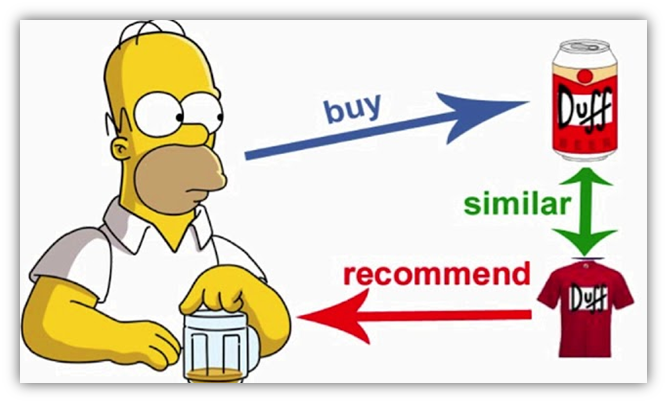

### Advantages of Content-Based Filtering
- **`User independence`**: The content-based method only has to analyze the items and a single user’s profile for the recommendation, which makes the process less cumbersome. Content-based filtering would thus produce more reliable results with fewer users in the system.
- **`Transparency`** : Collaborative filtering gives recommendations based on other unknown users who have the same taste as a given user, but with content-based filtering, items are recommended on a feature-level basis.
- **`No cold start`** : As opposed to collaborative filtering, new items can be suggested before being rated by a substantial number of users.

### Disadvantages of Content-Based Filtering
- **`Limited content analysis`**: If the content doesn’t contain enough information to discriminate the items precisely, the recommendation itself risks being imprecise.
- **`Over-specialization`**: Content-based filtering provides a limited degree of novelty since it has to match up the features of a user’s profile with available items. In the case of item-based filtering, only item profiles are created and users are suggested items similar to what they rate or search for, instead of their past history. A perfect content-based filtering system may suggest nothing unexpected or surprising.

Source: **Content-Based Recommendation System** - https://medium.com/@bindhubalu/content-based-recommender-system-4db1b3de03e7

## Collaborative Filtering Systems

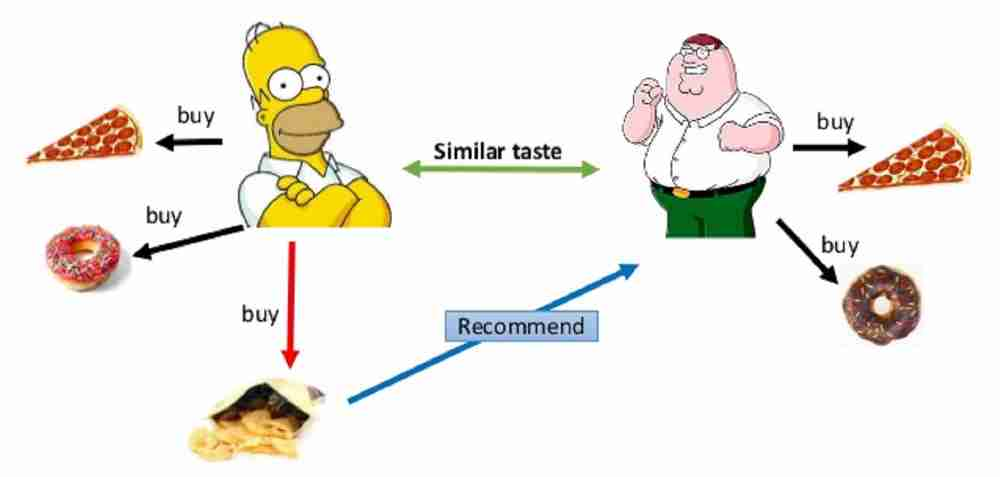

**`Collaborative Filtering`**: This method makes automatic predictions (filtering) about **the interests of a user by collecting preferences or taste information from many users (collaborating)**. The underlying assumption of the collaborative filtering approach is that if a person A has the same opinion as a person B on a set of items, A is more likely to have B's opinion for a given item than that of a randomly chosen person.

Before recommender systems existed, the primary way to get recommendations about things like movies or products was to ask your friends. As you followed recommendations from them, you would get a sense of which friends had tastes that were most similar to yours and rely on their recommendations more frequently. However, as the number of options available to us has increased drastically over the last few decades, it became increasingly difficult to rely on recommendations from a small group of friends because it also became increasingly likely that they were not aware of all the available options. The solution for this was a method called _collaborative filtering_.

Collaborative filtering provides us with a way of making automatic predictions (filtering) about the interests of a user by collecting preferences from many users (collaborating). The underlying assumption is that if two people have the same opinion on one issue, they are likely to have a similar opinion on other issues as well. There are a few different ways to approach collaborative filtering, but generally speaking, they involve finding a group of people similar to a user, analyzing the things they like, and coming up with a ranked list of recommendations for the user.

https://realpython.com/build-recommendation-engine-collaborative-filtering/ <br>
https://en.wikipedia.org/wiki/Collaborative_filtering

# Euclidean distance

- The Euclidean distance between two points in either the plane or 3-dimensional space measures the length of a segment connecting the two points. It is the most obvious way of representing distance between two points.<br>
- The Pythagorean Theorem can be used to calculate the distance between two points, as shown in the figure below. If the points (x1,y1) and (x2,y2) are in 2-dimensional space, then the Euclidean distance between them is $ \sqrt{(x2−x1)^2+(y2−y1)^2} $.

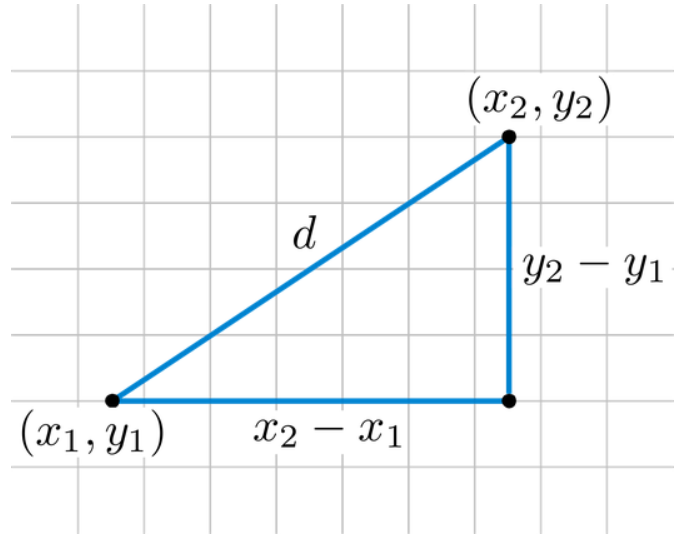

- For points (x1,y1,z1) and (x2,y2,z2) in 3-dimensional space, the Euclidean distance between them is $ \sqrt{(x2−x1)^2+(y2−y1)^2+(z2−z1)^2} $. For example, the Euclidean distance between (−1,2,3) and (4,0,−3) is $ \sqrt{25+4+36} $ = $ \sqrt{65} $.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x1, y1 = (1, 5)
x2, y2 = (5, 2)

# points 'a' & 'b'
a = [x1, y1]
b = [x2, y2]

Euclidean Distance(d): 5.0


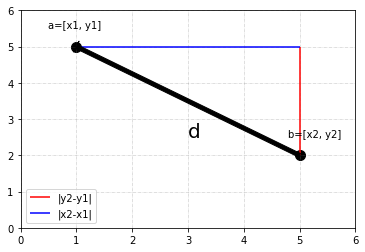

In [3]:
# Plot point 'a' & 'b'
plt.scatter(x1, y1, c='k', s=100)
plt.scatter(x2, y2, c='k', s=100)

# Annotation of 'a' & 'b'
plt.annotate('a=[x1, y1]', xy=(x1 + 1, y1), xytext=(x1 - 0.5, y1 + 0.5))
plt.annotate('b=[x2, y2]', xy=(x2, y2), xytext=(x2 - 0.2, y2 + 0.5))

# Set the x limits & y limits of the current axes
plt.xlim([0, 6])
plt.ylim([0, 6])

# Higher distances: vlines, hlines
plt.vlines(x=max(x1, x2), ymin=min(y1, y2), ymax=max(y1, y2), color='red', label='|y2-y1|')
plt.hlines(y=max(y1, y2), xmin=min(x1, x2), xmax=max(x1, x2), color='blue', label='|x2-x1|')

# Plot the line of distance between two points 'a' & 'b'
plt.annotate('', xy=a, xytext=b, arrowprops=dict(facecolor='black', 
                                                 shrink= 0,          # move the tip and base some percent away from the annotated point and text
                                                 headlength=0.0001)) # The length of the arrow head in points
#arrowprops: dict,optional - The properties used to draw a FancyArrowPatch arrow between the positions 'xy' and 'xytext'

# Annotate 'd'
plt.annotate('d', xy=(3, 2.5), xytext=(3, 2.5), fontsize=20)

# Configure the grid lines
plt.grid(alpha=0.5, color='grey', linestyle='-.', linewidth=0.5)

# Place a legend on the axes
plt.legend(loc='lower left')

# print the value of Euclidean Distance between two points 'a' & 'b'
print(f'Euclidean Distance(d): {np.sqrt((x2-x1)**2 + (y2-y1)**2)}')

# movie_ratings.csv

`User similarity` is at the heart of collaborative filtering. <br>
In order **to make good recommendations**, we need to know **how alike** two users are. <br>
The way to do this is by comparing how similar their ratings for the same product have been.

In [4]:
# import dataset & transform it
ratings = pd.read_csv('./data/movie_ratings.csv').set_index('Movie').T
ratings.head()

Movie,Aquaman,Avengers: Infinity War,Black Panther,Bohemian Rhapsody,Deadpool 2,Fantastic Beasts: The Crimes of Grindelwald,Incredibles 2,Jurassic World: Fallen Kingdom,Mission: Impossible – Fallout,Venom
Brandon,4,2,5,2,3,5,4,2,5,4
Emily,1,5,2,3,2,4,2,3,5,1
Cleo,2,2,5,4,4,1,3,5,4,4
Rusty,2,5,1,4,5,2,4,4,3,5
Samantha,2,5,1,1,1,5,4,5,2,2


This data frame contains 10 movies and ratings from 5 users on a scale from 1 (they didn't like it) to 5 (they loved it).

In [5]:
# Indexes of dataset of 'ratings' are the user´s names 
list(ratings.index)

['Brandon', 'Emily', 'Cleo', 'Rusty', 'Samantha']

In [6]:
for i in enumerate(list(ratings.index)):
    print(i)

(0, 'Brandon')
(1, 'Emily')
(2, 'Cleo')
(3, 'Rusty')
(4, 'Samantha')


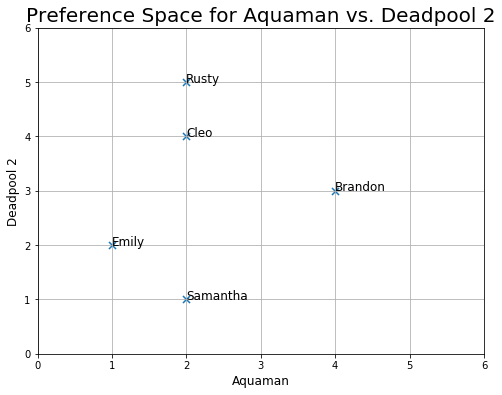

In [7]:
movie1 = 'Aquaman'
movie2 = 'Deadpool 2'

# Define x & y
x = ratings.loc[:, movie1]
y = ratings.loc[:, movie2]

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y, s=50, marker='x')
ax.set_title(f'Preference Space for {movie1} vs. {movie2}', fontsize=20)

# Set the x limits & y limits of the current axes
ax.set_xlim([0,6])
ax.set_ylim([0,6])

# Set labels of axes
ax.set_xlabel(f'{movie1}', fontsize=12)
ax.set_ylabel(f'{movie2}', fontsize=12)

# Annotate Names of user for each
n = list(ratings.index)
for i, name in enumerate(n):
    ax.annotate(name, xy=(x[i],y[i]), fontsize=12)


# Configure the grid lines
plt.grid()

If we wanted to take a look at their user ratings across the preference space of two movies, we could define a function that accepts two movie titles and scatter plots the user ratings as follows.

In [8]:
def ratings_scatter (movie1, movie2):
    '''
    Make a função to plot the points of users between the selected 2 movies
    '''
    # Define x & y
    x = ratings.loc[:, movie1]
    y = ratings.loc[:, movie2]

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(x, y, s=50, marker='x')
    ax.set_title(f'Preference Space for {movie1} vs. {movie2}', fontsize=20)

    # Set the x limits & y limits of the current axes
    ax.set_xlim([0,6])
    ax.set_ylim([0,6])

    # Set labels of axes
    ax.set_xlabel(f'{movie1}', fontsize=12)
    ax.set_ylabel(f'{movie2}', fontsize=12)

    # Annotate Names of user for each
    n = list(ratings.index)
    for i, name in enumerate(n):
        ax.annotate(name, xy=(x[i],y[i]), fontsize=12)


    # Configure the grid lines
    plt.grid(alpha=0.5, color='grey', linestyle='-.', linewidth=0.5)

Then, we would just need to choose two titles and generate the plot to visualize the preference space for users across those two movies. For example, below is the preference space across the movies Venom and Incredibles 2.

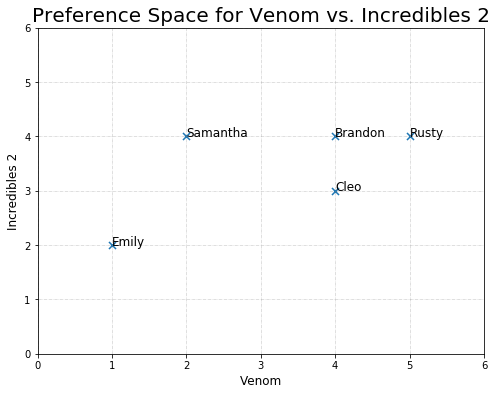

In [9]:
ratings_scatter ('Venom', 'Incredibles 2')

We can see that across this preference space, Rusty is more similar to Brandon than he is Emily. However, this can vary across different sets of movies. If we instead scatter plot the ratings for Bohemian Rhapsody and Jurassic World, Rusty is more similar to Emily than to Brandon in this preference space.

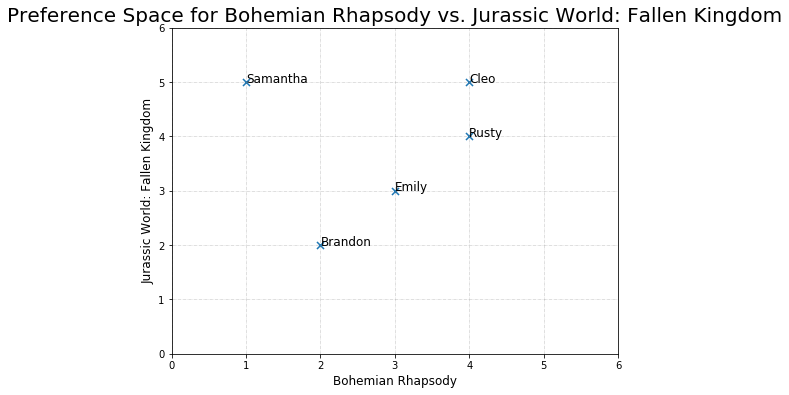

In [10]:
ratings_scatter('Bohemian Rhapsody', 'Jurassic World: Fallen Kingdom')

# Measuring distances in python (scipy, sklearn)
- from scipy.spatial.distance import pdist,squareform

To get the aggregate distance across all the preference spaces, we can use squareform and pdist from the Scipy library to create a matrix containing the Euclidean distances between all our users.

In [11]:
a = (x1, y1)
b = (x2, y2)

print(a,b)

(1, 5) (5, 2)


Text(5, 2, '')

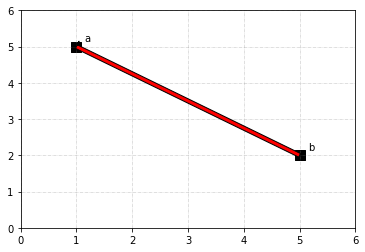

In [12]:
# plot the points 'a' & 'b'
plt.scatter(x1, y1, c='k', marker='s', s=100)
plt.scatter(x2, y2, c='k', marker='s', s=100)

# Configure the grid lines
plt.grid(alpha=0.5, color='grey', linestyle='-.', linewidth=0.5)

# Set the x limits & y limits of the current axes
plt.xlim([0,6])
plt.ylim([0,6])

# Annotation
plt.annotate('a', np.array(a) + (0.15, 0.15));
plt.annotate('b', np.array(b) + (0.15, 0.15));

# plot line of distance between 2 points
plt.annotate('', xy=(x1,y1), xytext=(x2,y2), arrowprops=dict(facecolor='red', shrink=0, headlength=0.0001))

## from scipy.spatial.distance import pdist,squareform

In [13]:
from scipy.spatial.distance import pdist,squareform

# Pairwise distances between observations in n-dimensional space.
pdist([a,b], metric='euclidean') # X = n-dimensional array, *metric='euclidean' as defalut

array([5.])

In [14]:
# Convert a vector-form distance vector to a square-form distance matrix, and vice-versa.
squareform(pdist([a,b]))

array([[0., 5.],
       [5., 0.]])

In [15]:
pd.DataFrame(squareform(pdist([a,b])),
            index=['a','b'], 
            columns=['a','b'])

,a,b
a,0.0,5.0
b,5.0,0.0


## from sklearn.metrics import pairwise_distances

In [16]:
from sklearn.metrics import pairwise_distances

In [17]:
# Compute the distance matrix from a vector array X and optional Y
pairwise_distances([a,b], metric='euclidean') # *metric='euclidean' as default

array([[0., 5.],
       [5., 0.]])

In [18]:
pd.DataFrame(pairwise_distances([a,b]),
            index=['a','b'],
            columns=['a','b'])

,a,b
a,0.0,5.0
b,5.0,0.0


## Real application: Measuring distance in terms of movie_ratings

In [19]:
ratings = pd.read_csv('./data/movie_ratings.csv').set_index('Movie').T
ratings.head()

Movie,Aquaman,Avengers: Infinity War,Black Panther,Bohemian Rhapsody,Deadpool 2,Fantastic Beasts: The Crimes of Grindelwald,Incredibles 2,Jurassic World: Fallen Kingdom,Mission: Impossible – Fallout,Venom
Brandon,4,2,5,2,3,5,4,2,5,4
Emily,1,5,2,3,2,4,2,3,5,1
Cleo,2,2,5,4,4,1,3,5,4,4
Rusty,2,5,1,4,5,2,4,4,3,5
Samantha,2,5,1,1,1,5,4,5,2,2


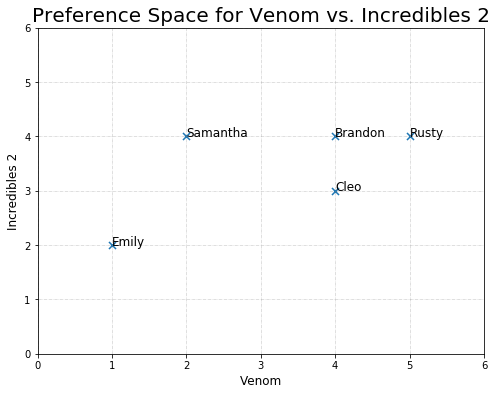

In [20]:
ratings_scatter('Venom', 'Incredibles 2')

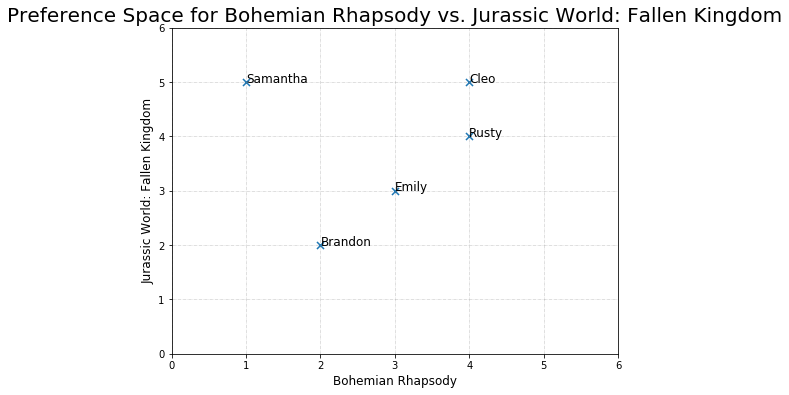

In [21]:
ratings_scatter('Bohemian Rhapsody', 'Jurassic World: Fallen Kingdom')

In [22]:
ratings[['Venom', 'Incredibles 2']]

Movie,Venom,Incredibles 2
Brandon,4,4
Emily,1,2
Cleo,4,3
Rusty,5,4
Samantha,2,4


In [23]:
distances = squareform(pdist(ratings[['Venom', 'Incredibles 2']]))
distances

array([[0.        , 3.60555128, 1.        , 1.        , 2.        ],
       [3.60555128, 0.        , 3.16227766, 4.47213595, 2.23606798],
       [1.        , 3.16227766, 0.        , 1.41421356, 2.23606798],
       [1.        , 4.47213595, 1.41421356, 0.        , 3.        ],
       [2.        , 2.23606798, 2.23606798, 3.        , 0.        ]])

In [24]:
ratings.index

Index(['Brandon', 'Emily', 'Cleo', 'Rusty', 'Samantha'], dtype='object')

In [25]:
# Dataframe for distance between users
pd.DataFrame(distances, index=ratings.index, columns= ratings.index)

,Brandon,Emily,Cleo,Rusty,Samantha
Brandon,0.000000,3.605551,1.000000,1.000000,2.000000
Emily,3.605551,0.000000,3.162278,4.472136,2.236068
Cleo,1.000000,3.162278,0.000000,1.414214,2.236068
Rusty,1.000000,4.472136,1.414214,0.000000,3.000000
Samantha,2.000000,2.236068,2.236068,3.000000,0.000000


## What happens if we calculated the distance for the whole dataset, then?

It considers all columns as dimensions. And it will calculate the distance in that big dimension.

In [26]:
# pairwise distance
distance = pdist(ratings) 
distance

array([6.63324958, 6.        , 7.41619849, 7.48331477, 6.92820323,
       6.40312424, 5.09901951, 5.56776436, 8.24621125, 6.70820393])

In [27]:
squareform(distance)

array([[0.        , 6.63324958, 6.        , 7.41619849, 7.48331477],
       [6.63324958, 0.        , 6.92820323, 6.40312424, 5.09901951],
       [6.        , 6.92820323, 0.        , 5.56776436, 8.24621125],
       [7.41619849, 6.40312424, 5.56776436, 0.        , 6.70820393],
       [7.48331477, 5.09901951, 8.24621125, 6.70820393, 0.        ]])

In [28]:
distance_matrix= pd.DataFrame(squareform(distance),
                              index=ratings.index,
                              columns=ratings.index)
distance_matrix

,Brandon,Emily,Cleo,Rusty,Samantha
Brandon,0.000000,6.633250,6.000000,7.416198,7.483315
Emily,6.633250,0.000000,6.928203,6.403124,5.099020
Cleo,6.000000,6.928203,0.000000,5.567764,8.246211
Rusty,7.416198,6.403124,5.567764,0.000000,6.708204
Samantha,7.483315,5.099020,8.246211,6.708204,0.000000


## Similarity

These distances are smaller for users that are more similar, but for our purposes it would be preferable to have:<br>
 - **a higher score** for users that are **more similar** and <br>
 - **a lower score** for users that are **less similar**. <br>

We can easily achieve this by `adding 1 to the scores` and `inverting them`.
>- inverse of distance is how similar: `1/squareform(distance)`
>- but I want to put the most similar as **1**: **`1/(1 + squareform(distance))`**

In [29]:
similarity_index = pd.DataFrame(1/(1+squareform(distance)),
                                index=ratings.index,
                                columns=ratings.index)
similarity_index

,Brandon,Emily,Cleo,Rusty,Samantha
Brandon,1.000000,0.131006,0.142857,0.118818,0.117878
Emily,0.131006,1.000000,0.126132,0.135078,0.163961
Cleo,0.142857,0.126132,1.000000,0.152259,0.108152
Rusty,0.118818,0.135078,0.152259,1.000000,0.129732
Samantha,0.117878,0.163961,0.108152,0.129732,1.000000


## Function of create_similarity

In [30]:
def create_similarity (dataframe, metric='euclidean'):
    """
    Given a dataframe, return its similarity matrix 
    """
    distance_vector = pdist(dataframe)
    distance_matrix = squareform(distance_vector)
    similarities = 1 /(1 + distance_matrix)
    similarity_index = pd.DataFrame(similarities,
                                   index= dataframe.index,
                                   columns= dataframe.index)
    return similarity_index

In [31]:
create_similarity(ratings)

,Brandon,Emily,Cleo,Rusty,Samantha
Brandon,1.000000,0.131006,0.142857,0.118818,0.117878
Emily,0.131006,1.000000,0.126132,0.135078,0.163961
Cleo,0.142857,0.126132,1.000000,0.152259,0.108152
Rusty,0.118818,0.135078,0.152259,1.000000,0.129732
Samantha,0.117878,0.163961,0.108152,0.129732,1.000000


## new_person: Generating Recommendations for a User

Suppose that we had **a new user named** **`Andre`** who came to us with the following ratings for each movie.

In [32]:
ratings.columns

Index(['Aquaman', 'Avengers: Infinity War', 'Black Panther',
       'Bohemian Rhapsody', 'Deadpool 2',
       'Fantastic Beasts: The Crimes of Grindelwald', 'Incredibles 2',
       'Jurassic World: Fallen Kingdom', 'Mission: Impossible – Fallout',
       'Venom'],
      dtype='object', name='Movie')

In [33]:
# new person´s rating
new_person = {'Aquaman': 2,
              'Avengers: Infinity War': 1,
              'Black Panther': 5,
              'Bohemian Rhapsody': 5,
              'Deadpool 2': 2,
              'Fantastic Beasts: The Crimes of Grindelwald': 3,
              'Incredibles 2': 3,
              'Jurassic World: Fallen Kingdom': 4,
              'Mission: Impossible – Fallout': 3,
              'Venom': 3}

In [34]:
pd.Series(new_person, name='Andre')

Aquaman                                        2
Avengers: Infinity War                         1
Black Panther                                  5
Bohemian Rhapsody                              5
Deadpool 2                                     2
Fantastic Beasts: The Crimes of Grindelwald    3
Incredibles 2                                  3
Jurassic World: Fallen Kingdom                 4
Mission: Impossible – Fallout                  3
Venom                                          3
Name: Andre, dtype: int64

In [35]:
person = pd.DataFrame(pd.Series(new_person, name='Andre')).T
person

,Aquaman,Avengers: Infinity War,Black Panther,Bohemian Rhapsody,Deadpool 2,Fantastic Beasts: The Crimes of Grindelwald,Incredibles 2,Jurassic World: Fallen Kingdom,Mission: Impossible – Fallout,Venom
Andre,2,1,5,5,2,3,3,4,3,3


### Merged DataFrame

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

In [36]:
merged_dataframe = pd.concat([ratings, person], axis=0)
merged_dataframe

Movie,Aquaman,Avengers: Infinity War,Black Panther,Bohemian Rhapsody,Deadpool 2,Fantastic Beasts: The Crimes of Grindelwald,Incredibles 2,Jurassic World: Fallen Kingdom,Mission: Impossible – Fallout,Venom
Brandon,4,2,5,2,3,5,4,2,5,4
Emily,1,5,2,3,2,4,2,3,5,1
Cleo,2,2,5,4,4,1,3,5,4,4
Rusty,2,5,1,4,5,2,4,4,3,5
Samantha,2,5,1,1,1,5,4,5,2,2
Andre,2,1,5,5,2,3,3,4,3,3


### Similarity

We could factor **`Andre`** into our similarity matrix and then determine which other users are most similar to him.

In [37]:
similarities = create_similarity(merged_dataframe)
similarities

,Brandon,Emily,Cleo,Rusty,Samantha,Andre
Brandon,1.000000,0.131006,0.142857,0.118818,0.117878,0.156613
Emily,0.131006,1.000000,0.126132,0.135078,0.163961,0.135078
Cleo,0.142857,0.126132,1.000000,0.152259,0.108152,0.217129
Rusty,0.118818,0.135078,0.152259,1.000000,0.129732,0.126132
Samantha,0.117878,0.163961,0.108152,0.129732,1.000000,0.116961
Andre,0.156613,0.135078,0.217129,0.126132,0.116961,1.000000


In [38]:
similarities['Andre']

Brandon     0.156613
Emily       0.135078
Cleo        0.217129
Rusty       0.126132
Samantha    0.116961
Andre       1.000000
Name: Andre, dtype: float64

In [39]:
similarities['Andre'].drop('Andre')

Brandon     0.156613
Emily       0.135078
Cleo        0.217129
Rusty       0.126132
Samantha    0.116961
Name: Andre, dtype: float64

It looks like Cleo is the user that is most similar to Tom, followed by Brandon, Emily, Rusty, and then Samantha. These similarity scores should be taken into consideration when recommending movies to Andre that he has not yet seen.

### movie_ratings2

Let's say that everyone but Tom also rated the movies in the movie_ratings2.csv file. Let's import those ratings and then combine them with the similarity scores to generate movie recommendations to Tom.

In [40]:
new_ratings = pd.read_csv('./data/movie_ratings2.csv').set_index('Movie')
new_ratings

,Brandon,Emily,Cleo,Rusty,Samantha
Movie,,,,,
Beauty and the Beast,2,5,2,5,2
Despicable Me 3,4,5,5,1,2
Guardians of the Galaxy Vol. 2,4,1,5,4,2
Jumanji: Welcome to the Jungle,4,3,3,2,5
Spider-Man: Homecoming,1,3,5,2,5
Star Wars: The Last Jedi,5,4,1,2,2
The Fate of the Furious,2,1,3,3,3
Thor: Ragnarok,4,3,4,1,5
Wolf Warrior 2,5,3,2,3,4


Once we have our new_ratings data frame, we are going to copy it to a new recommendations data frame which we will perform our calculations on.

In [41]:
recommendations = new_ratings.copy()
recommendations

,Brandon,Emily,Cleo,Rusty,Samantha
Movie,,,,,
Beauty and the Beast,2,5,2,5,2
Despicable Me 3,4,5,5,1,2
Guardians of the Galaxy Vol. 2,4,1,5,4,2
Jumanji: Welcome to the Jungle,4,3,3,2,5
Spider-Man: Homecoming,1,3,5,2,5
Star Wars: The Last Jedi,5,4,1,2,2
The Fate of the Furious,2,1,3,3,3
Thor: Ragnarok,4,3,4,1,5
Wolf Warrior 2,5,3,2,3,4


In [42]:
similarities['Andre'].drop('Andre')

Brandon     0.156613
Emily       0.135078
Cleo        0.217129
Rusty       0.126132
Samantha    0.116961
Name: Andre, dtype: float64

In [43]:
dict(similarities['Andre'].drop('Andre'))

{'Brandon': 0.1566130288262323,
 'Emily': 0.13507810593582123,
 'Cleo': 0.21712927295533244,
 'Rusty': 0.1261319836228832,
 'Samantha': 0.11696132920126338}

In [44]:
dict(similarities['Andre'].drop('Andre')).items()

dict_items([('Brandon', 0.1566130288262323), ('Emily', 0.13507810593582123), ('Cleo', 0.21712927295533244), ('Rusty', 0.1261319836228832), ('Samantha', 0.11696132920126338)])

We are going to iterate through each of the other users' similarity scores with Andre and weight their recommendations of these new movies by their similarity score. We are then going to create a new Total column that sums up the total scores for each movie and sort on that so that the movies are in the order that they should be recommended to Andre.

In [45]:
for name, score in dict(similarities['Andre'].drop('Andre')).items():
    # contribuição de todos os meus amigos, 
    # ponderados pela distância deles para mim (score)
    recommendations[name] = recommendations[name] * score
recommendations

,Brandon,Emily,Cleo,Rusty,Samantha
Movie,,,,,
Beauty and the Beast,0.313226,0.675391,0.434259,0.630660,0.233923
Despicable Me 3,0.626452,0.675391,1.085646,0.126132,0.233923
Guardians of the Galaxy Vol. 2,0.626452,0.135078,1.085646,0.504528,0.233923
Jumanji: Welcome to the Jungle,0.626452,0.405234,0.651388,0.252264,0.584807
Spider-Man: Homecoming,0.156613,0.405234,1.085646,0.252264,0.584807
Star Wars: The Last Jedi,0.783065,0.540312,0.217129,0.252264,0.233923
The Fate of the Furious,0.313226,0.135078,0.651388,0.378396,0.350884
Thor: Ragnarok,0.626452,0.405234,0.868517,0.126132,0.584807
Wolf Warrior 2,0.783065,0.405234,0.434259,0.378396,0.467845


In [46]:
recommendations['Total'] = recommendations.sum(axis=1)
recommendations.sort_values(by='Total', ascending=False)

,Brandon,Emily,Cleo,Rusty,Samantha,Total
Movie,,,,,,
Despicable Me 3,0.626452,0.675391,1.085646,0.126132,0.233923,2.747544
Wonder Woman,0.626452,0.405234,0.868517,0.378396,0.467845,2.746445
Thor: Ragnarok,0.626452,0.405234,0.868517,0.126132,0.584807,2.611142
Guardians of the Galaxy Vol. 2,0.626452,0.135078,1.085646,0.504528,0.233923,2.585627
Jumanji: Welcome to the Jungle,0.626452,0.405234,0.651388,0.252264,0.584807,2.520145
Spider-Man: Homecoming,0.156613,0.405234,1.085646,0.252264,0.584807,2.484564
Wolf Warrior 2,0.783065,0.405234,0.434259,0.378396,0.467845,2.468799
Beauty and the Beast,0.313226,0.675391,0.434259,0.630660,0.233923,2.287458
Star Wars: The Last Jedi,0.783065,0.540312,0.217129,0.252264,0.233923,2.026693


From these results, it looks like Tom should like Despicable Me 3, Wonder Woman, and Thor but perhaps not Star Wars or The Fate of the Furious.

# Different Distance measures

<b>Minkowski Distance: </b> <br>
<font size="3">
$ \left(\sum_i^n|x_i - y_i|^p\right)^\frac{1}{p} $
</font>

<b> Manhattan distance (cityblock): p = 1 </b> <br>
<font size="3">
$ \sum_i^n|x_i - y_i| $

<b> Euclidean Distance: p = 2 </b> <br>
<font size="3">
$ \sqrt{\sum_i^n|x_i - y_i|^2} $

<b> Chebychev Distance: p $\rightarrow \infty$ </b>
<font size="3">    
$\left(\sum_i^n|x_i - y_i|^\infty\right)^\frac{1}{\infty} \rightarrow max(|x_i - y_i|)$

## Manhattan Distance:

In [47]:
x1, y1 = (1, 5)
x2, y2 = (5, 2)

# points 'a' & 'b'
a = [x1, y1]
b = [x2, y2]

Manhattan distance: 7


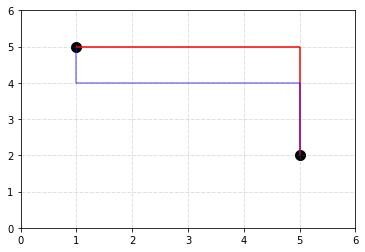

In [48]:
# Plot point 'a' & 'b'
plt.scatter(x1, y1, c='k', s=100)
plt.scatter(x2, y2, c='k', s=100)

# Set the x limits & y limits of the current axes
plt.xlim([0, 6])
plt.ylim([0, 6])

# Configure the grid lines
plt.grid(alpha=0.5, color='grey', linestyle='-.', linewidth=0.5)

# Higher distances: vlines, hlines
plt.vlines(x=max(x1, x2), ymin=min(y1, y2), ymax=max(y1, y2), color='red', label='|y2-y1|')
plt.hlines(y=max(y1, y2), xmin=min(x1, x2), xmax=max(x1, x2), color='red', label='|x2-x1|')

k = 1
plt.vlines(x=max(x1, x2), ymin=min(y2,y1), ymax=max(y1,y2)-k, color='blue', alpha=0.5)
plt.hlines(y=max(y1,y2)-k, xmin=min(x1,x2), xmax=max(x1,x2), color='blue', alpha=0.5)
plt.vlines(x=min(x1, x2), ymin=max(y2,y1)-k, ymax=max(y1,y2), color='blue', alpha=0.5)

print(f'Manhattan distance: {abs(x2-x1) + abs(y2-y1)}')

## Cosine Distance

Euclidean vs. Cosine Distance https://cmry.github.io/notes/euclidean-v-cosine<br>
https://wikidocs.net/24603


When to Use Cosine?
Cosine similarity is generally used as a metric for measuring distance when the magnitude of the vectors does not matter. This happens for example when working with text data represented by word counts. We could assume that when a word (e.g. science) occurs more frequent in document 1 than it does in document 2, that document 1 is more related to the topic of science. However, it could also be the case that we are working with documents of uneven lengths (Wikipedia articles for example). Then, science probably occurred more in document 1 just because it was way longer than document 2. Cosine similarity corrects for this.

In [49]:
x1, y1 = (1, 5)
x2, y2 = (4, 2)

a = [x1, y1]
b = [x2, y2]

Cosine distance: 0.38605938648507954


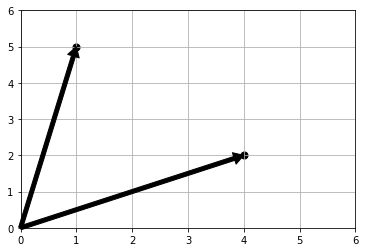

In [53]:
fig = plt.figure()

plt.scatter(x1, y1, color='k', s=50)
plt.scatter(x2, y2, color='k', s=50)
plt.grid()
# Set xlim and ylim
plt.xlim([0, 6])
plt.ylim([0, 6])

plt.annotate('', xy=(x1,y1), xytext=(0, 0), arrowprops=dict(facecolor='black', headlength=10))
plt.annotate('', xy=(x2,y2), xytext=(0, 0), arrowprops=dict(facecolor='black', headlength=10))

print(f'Cosine distance: {1 - np.dot(a, b) / (np.sqrt(np.dot(a,a)) * np.sqrt(np.dot(b,b)))}')

Cosine distance: 0.38605938648507954


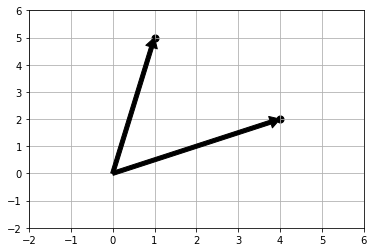

In [51]:
fig = plt.figure()

plt.scatter(x1, y1, color='k', s=50)
plt.scatter(x2, y2, color='k', s=50)
plt.grid()
# Set xlim and ylim 
plt.xlim([-2, 6])
plt.ylim([-2, 6])

plt.annotate('', xy=(x1,y1), xytext=(0, 0), arrowprops=dict(facecolor='black', headlength=10))
plt.annotate('', xy=(x2,y2), xytext=(0, 0), arrowprops=dict(facecolor='black', headlength=10))

print(f'Cosine distance: {1 - np.dot(a, b) / (np.sqrt(np.dot(a,a)) * np.sqrt(np.dot(b,b)))}')

Text(1, 5, '')

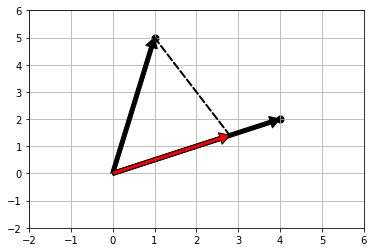

In [52]:
fig = plt.figure()

plt.scatter(x1, y1, color='k', s=50)
plt.scatter(x2, y2, color='k', s=50)
plt.grid()
plt.xlim([-2, 6])
plt.ylim([-2, 6])

cosine_similarity = np.dot(a, b) / (np.sqrt(np.dot(a,a)) * np.sqrt(np.dot(b,b)))

plt.annotate('', xy=(x1,y1), xytext=(0, 0), arrowprops=dict(facecolor='black', shrink=0, headlength=10))
plt.annotate('', xy=(x2,y2), xytext=(0, 0), arrowprops=dict(facecolor='black', shrink=0, headlength=10))

plt.annotate('', xy=(x2 * cosine_similarity * (np.dot(a,a)**.5/np.dot(b,b)**.5),  
                     y2 * cosine_similarity * (np.dot(a,a)**.5/np.dot(b,b)**.5)), 
             xytext=(0, 0), arrowprops=dict(facecolor='red', shrink=0, headlength=10))


plt.annotate('', xy=(x2 * cosine_similarity * (np.dot(a,a)**.5/np.dot(b,b)**.5),
                     y2 * cosine_similarity * (np.dot(a,a)**.5/np.dot(b,b)**.5)), xytext=(x1, y1), 
             arrowprops={"arrowstyle" : "-", "linestyle" : "--", "linewidth" : 2, "shrinkA": 0, "shrinkB": 0})


# Using Different Similarity Metrics

Now that we have generated an initial set of recommendations, there is an important topic we would like to circle back and discuss. When we computed our user similarity metrics, we used Euclidean distance as our distance metric. It is important to note that there are a number of other distance metrics in Scipy that we could potentially use to get different results. A full list of all the ones available can be found here.